# Previsão para admissão na faculdade

## Introdução

Baseado no [dataset](https://www.kaggle.com/datasets/safaruzzamanshovo/graduate-admission-dataset) do Kaggle, vou criar um modelo utilizando árvore de decisão que prevê a chance de admissão de novos alunos em universidades mediante seu histórico escolar e notas.

## Análise Exploratória dos Dados (EDA)

Antes de iniciar o modelo, vamos dar uma olhada no dataset e analisar algumas informações.

### Carregando o DataFrame

Vamos começar importando as bibliotecas necessárias e carregar o dataset para começarmos.

In [1]:
# Importando bibliotecas
import pandas as pd # Manipulação do Dataset
import numpy as np # Manipulação e tratamento dos dados
import matplotlib.pyplot as plt # Visualização dos dados

# Carregando o dataframe
admission_df = pd.read_csv('graduate_admission.csv')

# Mostrando as 5 primeiras linhas
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,295,96,2,4.9,1.7,2.93,0,0.612
1,340,119,3,4.1,1.7,3.76,0,0.708
2,336,96,1,3.2,1.8,3.12,1,0.728
3,337,108,4,3.4,1.3,2.11,0,0.643
4,323,98,1,1.1,1.3,3.40,0,0.524


Podemos observar que as colunas 'GRE Score' e 'TOEFL Score' estão fora de escala comparadas com as outras, logo vamos precisar normalizar essas colunas para que nosso modelo performe melhor. Além disso, o nosso target(alvo), 'Chance of Admit', está em porcentagem, então devemos criar uma nova coluna dummy (0 ou 1) para que nossa árvore de decisão performe melhor.

In [2]:
# Informações do dataframe
print(f'Há {admission_df.shape[0]} linhas e {admission_df.shape[1]} colunas.') # Mostra a quantidade de linhas e colunas
print('\n')
print('INFORMAÇÕES TÉCNICAS')
print(admission_df.info()) # Informações de cada coluna

Há 1000 linhas e 8 colunas.


INFORMAÇÕES TÉCNICAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          1000 non-null   int64  
 1   TOEFL Score        1000 non-null   int64  
 2   University Rating  1000 non-null   int64  
 3   SOP                1000 non-null   float64
 4   LOR                1000 non-null   float64
 5   GPA                1000 non-null   float64
 6   Research           1000 non-null   int64  
 7   Chance of Admit    1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB
None


Mediante as informações disponíveis, podemos observar que temos 1000 alunos no dataset, não há colunas categóricas(tipo string) e não há valores nulos.

In [3]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,315.840000,106.459000,3.053000,2.997000,3.014400,3.027160,0.517000,0.729223
std,15.083432,8.449954,1.421341,1.163239,1.163136,0.582774,0.499961,0.095161
min,290.000000,92.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.491000
25%,303.000000,99.000000,2.000000,2.000000,2.000000,2.530000,0.000000,0.655000
50%,316.000000,107.000000,3.000000,3.000000,3.000000,3.025000,1.000000,0.728500
75%,329.000000,114.000000,4.000000,4.000000,4.000000,3.550000,1.000000,0.801000
max,340.000000,120.000000,5.000000,5.000000,5.000000,4.000000,1.000000,0.970000


### Conclusão do EDA

Podemos observar que a maioria das universidades são nota 3 com uma variância de aproximadamente 1.4, logo os alunos admitidos estarão entrando em faculdades com boa reputação. Para isso, a maioria dos alunos conta com notas no TOEFL e GRE (Graduate Record Examination) de 315.8 e 106.4, respectivamente. Para ser aprovado nestes exames é necessário uma nota igual ou superior a 320 no GRE (nesta prova não há um número certo, sendo essa pontuação considerada boa para o exame) e 90 no TOEFL (também não é preciso, apenas uma média considerada aceitável).
</br>Em relação as chances de aprovação, temos que a maioria tem alta chance de entrarem em uma universidade, com média de aproximadamente 73% de chance, com uma variância(desvio da média) irrisória de 0,09. Isso se comprova com a mediana ficando próxima da média, o que nos diz que temos a maioria com grandes chances de adentrar em uma universidade.


## Modelo

### Modelo de classificação

Vamos utilizar árvore de decisão para prever nosso modelo, logo teremos que tratar nossas colunas e criar uma nova coluna dummy com aprovado ou não, com 60% como limite para ser aprovado. </br>
Antes, vamos ver as correlações de cada coluna com nosso targert. Como temos poucas colunas, irei utilizar todas como feature do modelo, logo vamos apenas dar uma olhada superficial nas correlações.

In [4]:
# Correlações com a coluna 'Chance of Admit' (target)
correlation = admission_df.corr()['Chance of Admit']
print(correlation)

GRE Score            0.103643
TOEFL Score          0.095582
University Rating    0.295981
SOP                  0.206102
LOR                  0.246334
GPA                  0.256385
Research             0.760349
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64


In [5]:
# Criando nova coluna
admission_df['Aprovado'] = np.where(admission_df['Chance of Admit'] >= 0.6, 1, 0) # Filtrando os dados e atribuindo 0 ou 1

# Podemos excluir a coluna 'Chance od Admit'
admission_df = admission_df.drop(columns='Chance of Admit')

# Verificando se criou a coluna corretamente
admission_df['Aprovado'].head(20)

0     1
1     1
2     1
3     1
4     0
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Aprovado, dtype: int64

In [6]:
# Importando função para separar os dados em treino e test
from sklearn.model_selection import train_test_split
# Importando função para tratamento das colunas 'TOEFL Score' e 'GRE Score'
from sklearn.preprocessing import StandardScaler
# Importando a árvore de decisão
from sklearn import tree

# Separando as features do target
X = admission_df.drop(columns='Aprovado') # features
y = admission_df['Aprovado'] # target

# Separando em treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Conferindo o shape(quantidade) de cada
print(f'Há {X_train.shape[0]} dados de features para treino.')
print(f'Há {X_test.shape[0]} dados de features para teste.')
print(f'Há {y_train.shape[0]} dados de target para treino.')
print(f'Há {y_test.shape[0]} dados de target para teste.')

Há 700 dados de features para treino.
Há 300 dados de features para teste.
Há 700 dados de target para treino.
Há 300 dados de target para teste.


Como pode-se perceber nas colunas, há dados que não estão normalizados entre si, com valores discrepantes. Para isso iremos normalizá-los com a função *StandardScaler* da ScikitLearn.

[Text(0.42997685185185186, 0.9583333333333334, 'x[6] <= -0.011\ngini = 0.178\nsamples = 700\nvalue = [69, 631]'),
 Text(0.4114583333333333, 0.875, 'x[5] <= -0.762\ngini = 0.319\nsamples = 346\nvalue = [69, 277]'),
 Text(0.42071759259259256, 0.9166666666666667, 'True  '),
 Text(0.16898148148148148, 0.7916666666666666, 'x[2] <= -1.084\ngini = 0.498\nsamples = 89\nvalue = [42.0, 47.0]'),
 Text(0.037037037037037035, 0.7083333333333334, 'x[3] <= 0.408\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.018518518518518517, 0.625, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.05555555555555555, 0.625, 'x[1] <= 0.484\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.037037037037037035, 0.5416666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.07407407407407407, 0.5416666666666666, 'x[0] <= -0.671\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05555555555555555, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09259259259259259, 0.45833

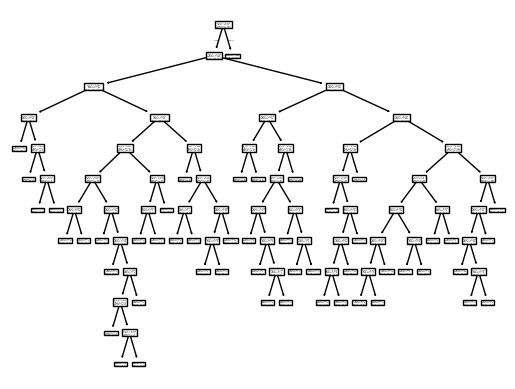

In [7]:
# Instanciando a função na variável
scaler = StandardScaler()
# Transformando nossas colunas de treino
X_train_scaled = scaler.fit_transform(X_train)
# Transformando nossas colunas de teste
X_test_scaled = scaler.transform(X_test)

# Instanciando uma variável para nossa árvore
model = tree.DecisionTreeClassifier()

# Modelando a variável com nossos dados de treino
model = model.fit(X_train_scaled, y_train)

# Visualizando a árvore
tree.plot_tree(model)

In [8]:
# Criando nossas predições
y_pred = model.predict(X_test_scaled)

Agora que treinamos e testamos nosso modelo, vamos avaliá-lo!

### Avaliando o modelo

Visualmente, podemos ver que o modelo parece ter performado bem. Para sabermos melhor, vamosm utilizar de ferramentas estatísticas para avaliar!

In [9]:
# Importando as métricas para avaliar o modelo
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score)

# Instanciando as métricas em variáveis
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

# Printando os resultados no output
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'Matriz de Confusão: {matriz}')

Acurácia: 0.9133333333333333
Precisão: 0.9560439560439561
Recall: 0.9490909090909091
Matriz de Confusão: [[ 13  12]
 [ 14 261]]


Nosso modelo teve uma acurácia de 91%, o que é uma ótima medida, e tanto o precision(que calcula a proporção de instâncias positivas previstas corretamente em relação ao total de instâncias previstas como positivas) e o recall(que calcula a proporção de instâncias positivas previstas corretamente em relação ao total de instâncias positivas reais.) tem boas métricas também.
</br>Nossa matriz de confusão também performou bem, com apenas 26 previsões erradas ao total.

Mesmo o modelo apresentando ótimas métricas de avaliação, não podemos tirar conclusões que ele performará da mesma forma com dados novos. Precisaríamos pegar um dataset externo com as mesmas características e testar!

## Conclusão

Pode-se concluir que o nosso modelo, dentro dos dados treinados, performou muito bem. Estou satisfeito com o resultado mas mesmo assim precisamos de dados externos para validar o modelo, ver se realmente ele está treinado adequadamente em novos dados.